### 1.1 Titel: 
- COVID-Zahlen im Januar 2020 und 2021
### 1.2 Fragestellung:
- Welche Länder waren von der Ersten und Zweiten COVID-Welle am meisten betrofen und was waren die Gründe dafür 
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("weekly-covid-cases.csv")  # Ersetze 'datei.csv' durch den Namen deiner Datei

# Die ersten 5 Zeilen anzeigen
df = pd.read_csv('weekly-covid-cases.csv', skiprows=1,
                names=["Entity","Code","Day","Weekly cases"])
df.head()  

,Entity,Code,Day,Weekly cases
0,Afghanistan,AFG,2020-01-09,0
1,Afghanistan,AFG,2020-01-10,0
2,Afghanistan,AFG,2020-01-11,0
3,Afghanistan,AFG,2020-01-12,0
4,Afghanistan,AFG,2020-01-13,0


In [14]:
df_pivot = df.pivot(index="Entity", columns="Day", values="Weekly cases")
df_pivot.head()

Day,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2024-11-15,2024-11-16,2024-11-17,2024-11-18,2024-11-19,2024-11-20,2024-11-21,2024-11-22,2024-11-23,2024-11-24
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,71.0,71.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.dtypes

Entity          object
Code            object
Day             object
Weekly cases     int64
dtype: object

In [16]:
print('Anzahl verschiedener Entity: ', len(df['Entity'].unique()))

Anzahl verschiedener Entity:  250


In [17]:
df['Entity'].value_counts()

Entity
Afghanistan      1782
Reunion          1782
Namibia          1782
Nauru            1782
Netherlands      1782
                 ... 
Thailand         1754
Germany          1278
Spain            1278
France           1270
United States    1228
Name: count, Length: 250, dtype: int64

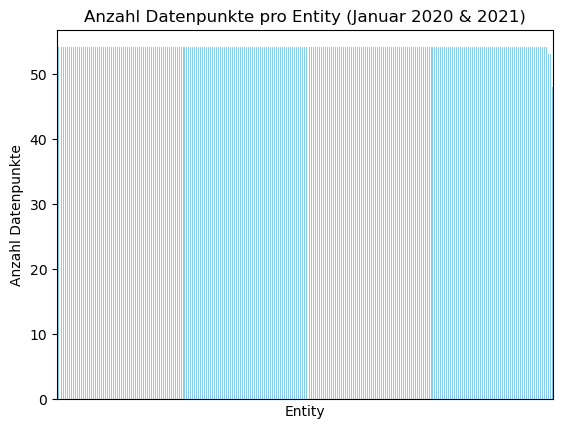

In [23]:
df['Day'] = pd.to_datetime(df['Day'])

# Daten filtern: Nur für Januar 2020 und 2021
gefiltert = df[(df['Day'].dt.year.isin([2020, 2021])) & (df['Day'].dt.month == 1)]

# Plotten der gefilterten Daten
gefiltert['Entity'].value_counts().plot(kind='bar', color='skyblue')  # Optional: Farbe anpassen

# Achsentitel und Diagrammtitel hinzufügen
plt.xticks([])  # Beschriftungen der x-Achse deaktivieren
plt.ylabel('Anzahl Datenpunkte')  # Y-Achsenbeschriftung
plt.title('Anzahl Datenpunkte pro Entity (Januar 2020 & 2021)')  # Diagrammtitel

# Diagramm anzeigen
plt.show()